In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\y5a1m\Anaconda3\envs\tf180\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#シード値を固定
np.random.seed(1671)

In [3]:
# 定数を定義
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [4]:
# データ・セットをロードする
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
RESHAPED = 32 * 32 * 3
X_train = X_train.reshape(50000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# 画素値を0-1に変換
X_train /= 255.0
X_test /= 255.0

In [7]:
# クラスラベル（0-9）をone-hotエンコーディング形式に変換
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [8]:
# モデルの定義
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

In [10]:
# コールバックの設定
earlystopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
callbacks = [earlystopping]

In [13]:
hist = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, 
          epochs=NB_EPOCH,
          verbose=VERBOSE, 
          callbacks=callbacks,
          validation_split=VALIDATION_SPLIT)

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 2s 43us/step - loss: 1.6972 - acc: 0.4195 - val_loss: 1.7588 - val_acc: 0.3930
Epoch 2/200
40000/40000 [==============================] - 2s 41us/step - loss: 1.6958 - acc: 0.4190 - val_loss: 1.7675 - val_acc: 0.3925
Epoch 3/200
40000/40000 [==============================] - 2s 42us/step - loss: 1.6926 - acc: 0.4186 - val_loss: 1.8200 - val_acc: 0.3706
Epoch 4/200
40000/40000 [==============================] - 2s 41us/step - loss: 1.6923 - acc: 0.4237 - val_loss: 1.7680 - val_acc: 0.3895
Epoch 5/200
40000/40000 [==============================] - 2s 43us/step - loss: 1.6913 - acc: 0.4217 - val_loss: 1.7754 - val_acc: 0.3852
Epoch 6/200
40000/40000 [==============================] - 2s 48us/step - loss: 1.6888 - acc: 0.4227 - val_loss: 1.7965 - val_acc: 0.3771
Epoch 7/200
40000/40000 [==============================] - 2s 46us/step - loss: 1.6878 - acc: 0.4221 - val_loss: 1.7614 - 

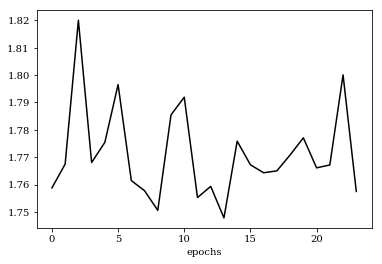

In [14]:
'''
学習の進み具合を可視化
'''
acc = hist.history['val_acc']
loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(loss)), loss,
         label='loss', color='black')
plt.xlabel('epochs')
plt.show()

In [15]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 38us/step

Test score: 1.7360110937118531
Test accuracy: 0.3977
